In [96]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import numpy as np
def zca_whiten(X):
    """
    Applies ZCA whitening to the data (X)
    http://xcorr.net/2011/05/27/whiten-a-matrix-matlab-code/

    X: numpy 2d array
        input data, rows are data points, columns are features

    Returns: ZCA whitened 2d array
    """
    assert(X.ndim == 2)
    EPS = 10e-5

    #   covariance matrix
    cov = np.dot(X.T, X)
    #   d = (lambda1, lambda2, ..., lambdaN)
    u, E, v = np.linalg.eigh(cov)
    #   D = diag(d) ^ (-1/2)
    D = np.diag(1. / np.sqrt(E + EPS))
    #   W_zca = E * D * E.T
    W = np.dot(np.dot(E, D), u.T)

    X_white = np.dot(X, W)

    return X_white

def zca_whitening_matrix(X, rowvar=False):
    """
    Function to compute ZCA whitening matrix (aka Mahalanobis whitening).
    INPUT:  X: [M x N] matrix.
        Rows: Variables
        Columns: Observations
    OUTPUT: ZCAMatrix: [M x M] matrix
    """
    # Covariance matrix [column-wise variables]: Sigma = (X-mu)' * (X-mu) / N
    sigma = np.cov(X, rowvar=rowvar) # [M x M]
    # Singular Value Decomposition. X = U * np.diag(S) * V
    U,E,V = np.linalg.svd(sigma)
        # U: [M x M] eigenvectors of sigma.
        # E: [M x 1] eigenvalues of sigma.
        # V: [M x M] transpose of U
    # Whitening constant: prevents division by zero
    epsilon = 1e-5
    # ZCA Whitening matrix: U * Lambda * U'
    D = np.diag(1.0/np.sqrt(E + epsilon))
    ZCAMatrix = np.dot(U, np.dot(D, V)) # [M x M]
    return ZCAMatrix


def flatten_matrix(matrix):
    vector = matrix.flatten(1)
    vector = vector.reshape(1, len(vector))
    return vector

def zca_whitening(inputs):
    print(inputs.shape[1])
    sigma = np.dot(inputs, inputs.T)/inputs.shape[1] #Correlation matrix
    U,S,V = np.linalg.svd(sigma) #Singular Value Decomposition
    epsilon = 1.e-5                #Whitening constant, it prevents division by zero
    D=np.diag(1.0/np.sqrt(np.diag(S + epsilon)))
    ZCAMatrix = np.dot(np.dot(U,D ),V) #ZCA Whitening matrix
    return np.dot(ZCAMatrix, inputs)   #Data whitening

#### Update modified object `oP7_DataBreed`

* `is_new_attribute` fixed to `True` : new attribute will not be updated.
* `is_new_attribute` fixed to `False` : new attribute will be updated. 

In [174]:
import P7_DataBreed
if True :
    oP7_DataBreed = P7_DataBreed.update_object_save(oP7_DataBreed, is_saved=True,is_new_attribute=True)


*** INFO : object is saved removing cv2.KeyPoint objects!


In [102]:
import P7_DataBreed
P7_DataBreed.P7_DataBreed.LIST_PIL_PROCESS

[<function P7_DataBreed.pil_square(pil_image, square=None)>,
 <function P7_DataBreed.pil_truncate(pil_image, std_size)>,
 <function P7_DataBreed.pil_edge(pil_image)>,
 <function P7_DataBreed.p7_filter_median(pil_image)>,
 <function P7_DataBreed.pil_2gray(pil_image)>,
 <function P7_DataBreed.pil_autocontrast(pil_image)>,
 <function P7_DataBreed.pil_equalize(pil_image)>]

In [146]:
import P7_DataBreed
oP7_DataBreed=P7_DataBreed.P7_DataBreed('./data/Images')
oP7_DataBreed.std_size=None
oP7_DataBreed.is_squarred=False
oP7_DataBreed.is_kp_filtered=False
is_splitted=True
oP7_DataBreed.split_ratio=(3,3)
oP7_DataBreed.load()

breed_count=3
image_per_breed_count=200
oP7_DataBreed.sampling(breed_count, image_per_breed_count)
oP7_DataBreed.show()


Building...

 
Path to data directory ........ : ./data/Images
Number of original breeds ..... : 120
Total number of images ........ : 20580
Standard images size .......... : None
SIFT Image descriptors count .. : 0
Sampling : breeds count ....... : 3
Sampling : images per breed ... : 200
X train size .................. : 0
y train size .................. : 0
X test size ................... : 0
y test size ................... : 0
Clusters models  .............. : dict_keys([])
Current cluster model  ........ : 
Bag of features dataframe ..... : (0, 0)
Encoded labels from dataset ... : ()
Number of breeds in sample .... : 3
Image splitted ................ : False
Key point descriptors ......... : (128,)
Classifier name ............... : 
Supported classifiers ......... : []
Number of restricted images ... : 0
Splitted parts ................ : (3, 3)
Dataframe images descriptors .. : 0 / Index([], dtype='object')
KP filtering .................. : False
Squarred images ............... : F

In [149]:
import P7_DataBreed

oP7_DataBreed.breed_show()
oP7_DataBreed.show_image_name('Norwegian_elkhound')


Breed directory= n02105162-malinois              Breed name= malinois
Breed directory= n02105412-kelpie                Breed name= kelpie
Breed directory= n02091467-Norwegian_elkhound    Breed name= Norwegian_elkhound
Directory breed name = ./data/Images/n02091467-Norwegian_elkhound

Number of images =74
Image name= n02091467_2240.jpg
Image name= n02091467_5074.jpg
Image name= n02091467_1330.jpg
Image name= n02091467_4842.jpg
Image name= n02091467_3160.jpg
Image name= n02091467_235.jpg
Image name= n02091467_6103.jpg
Image name= n02091467_2950.jpg
Image name= n02091467_2080.jpg
Image name= n02091467_4411.jpg
Image name= n02091467_898.jpg
Image name= n02091467_3071.jpg
Image name= n02091467_4436.jpg
Image name= n02091467_1655.jpg
Image name= n02091467_6457.jpg
Image name= n02091467_7085.jpg
Image name= n02091467_5134.jpg
Image name= n02091467_3474.jpg
Image name= n02091467_2646.jpg
Image name= n02091467_5629.jpg
Image name= n02091467_4558.jpg
Image name= n02091467_5367.jpg
Image name= n

(308, 500)
KP= 50
DESC= (50, 128)


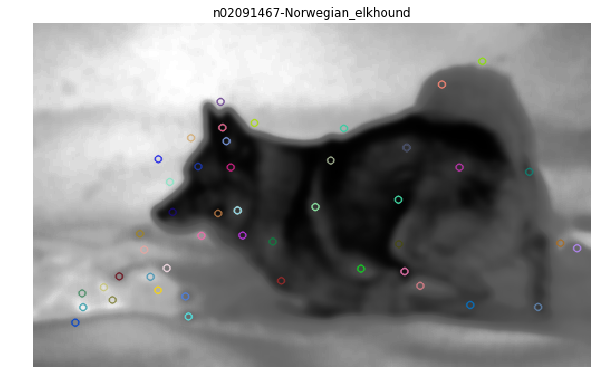

In [169]:
import numpy as np
import p7_util
import P7_DataBreed

dirbreed  = 'n02091467-Norwegian_elkhound'
breedname = 'Norwegian_elkhound'
imagename = 'n02091467_2240.jpg'
#imagename = 'n02115641_592.jpg'
pil_image = oP7_DataBreed.read_image(dirbreed,imagename)

np.array(pil_image).shape
pil_image

pil_image = P7_DataBreed.pil_2gray(pil_image)
#pil_image = P7_DataBreed.pil_square(pil_image)
print(np.array(pil_image).shape)
if True :
    filename, pil_image = p7_util.p7_filter_median(pil_image)
    filename, pil_image = p7_util.p7_filter_gaussian(pil_image, size=3)
    pil_image = P7_DataBreed.pil_autocontrast(pil_image)
    pil_image = P7_DataBreed.pil_equalize(pil_image)

    
P7_DataBreed.show_pil_image_and_kp(pil_image,dirbreed)
#pil_image_0 = pil_image
#pil_image_1 = pil_image

May Key points are localized inside dog silhouette.
<br>
Filtering may be focused on dog edge in prder KP to be most located on edges.

#### Data exploration : effect of image filters and KP filtering

*** build_sift_desc() ...

INFO : Error = 0 Total images processed= 16


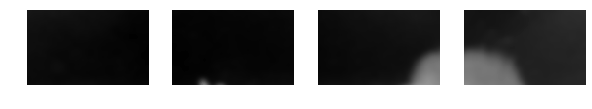

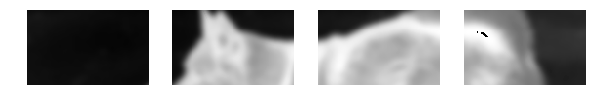

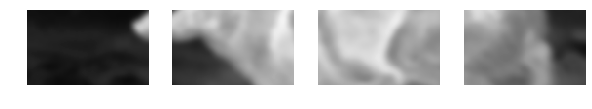

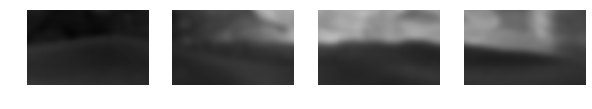

In [171]:
oP7_DataBreed_explorer = oP7_DataBreed.image_explore(breedname,imagename, is_squarred=False,std_size=None)

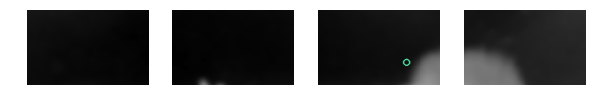

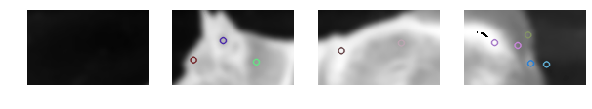

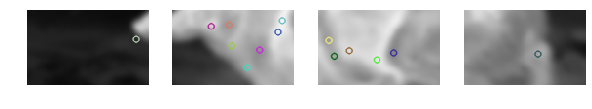

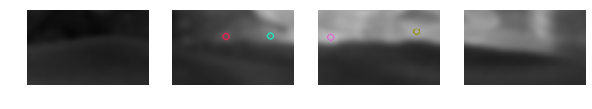

In [172]:
list_kpdesc, dict_breed_kpdesc_image_raw = oP7_DataBreed_explorer.plot_kpdesc_image()

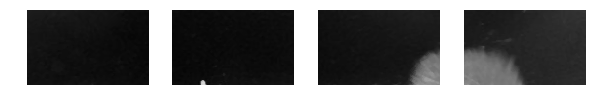

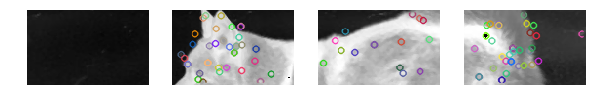

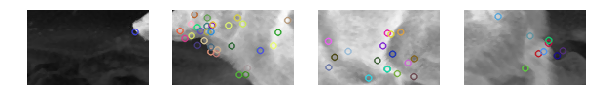

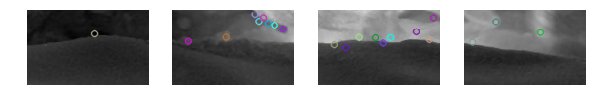

In [160]:
import p7_util

p7_util.p7_image_pil_show(dict_breed_kpdesc_image_raw\
                          ,size_x=10,std_image_size=None,is_title=False)

#### Canny processing

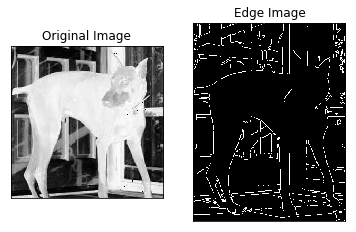

In [121]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

absolute_path = oP7_DataBreed.get_image_filename(breedname, imagename)
pil_image = oP7_DataBreed.read_image(dirbreed,imagename)
pil_image = P7_DataBreed.pil_2gray(pil_image)
pil_image = P7_DataBreed.pil_square(pil_image)
pil_image = P7_DataBreed.pil_edge(pil_image)


#edges = cv2.Canny(np.array(pil_image),200,400)

plt.subplot(121),plt.imshow(np.array(pil_image),cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

KP= 217
DESC= (217, 128)


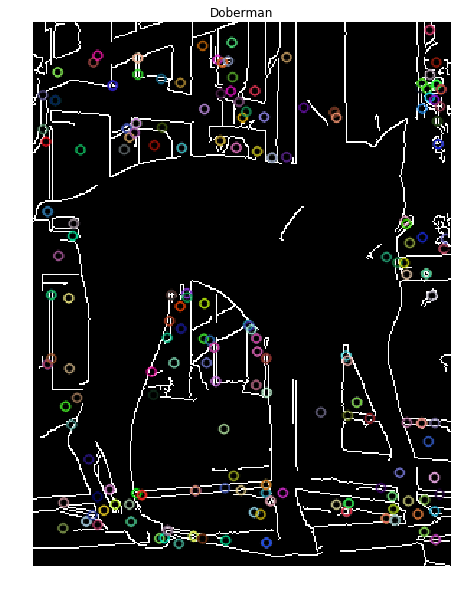

In [122]:
P7_DataBreed.show_pil_image_and_kp(edges,breedname)

KP= 633
DESC= (633, 128)


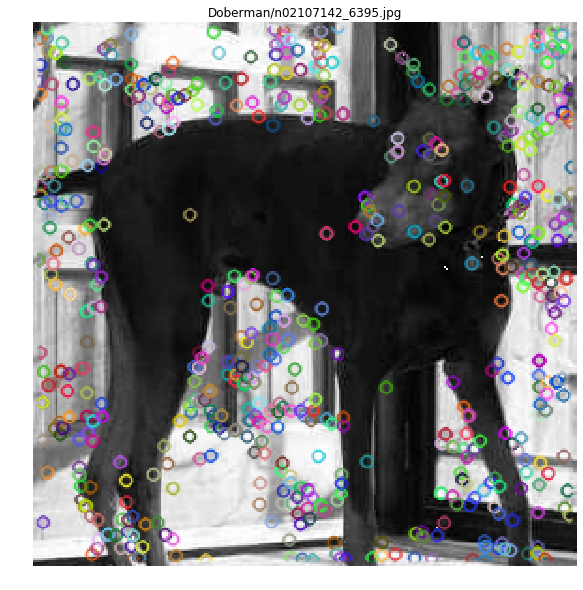

In [123]:
pil_image = P7_DataBreed.pil_edge(pil_image)
P7_DataBreed.show_pil_image_and_kp(pil_image,breedname+'/'+imagename)

KP are now located on edges on into image background.

##### Chain PIL image processing

In [120]:
P7_DataBreed.P7_DataBreed.LIST_PIL_PROCESS

[<function P7_DataBreed.pil_square(pil_image, square=None)>,
 <function P7_DataBreed.pil_edge(pil_image)>,
 <function P7_DataBreed.p7_filter_median(pil_image)>,
 <function P7_DataBreed.pil_2gray(pil_image)>,
 <function P7_DataBreed.pil_autocontrast(pil_image)>,
 <function P7_DataBreed.pil_equalize(pil_image)>]

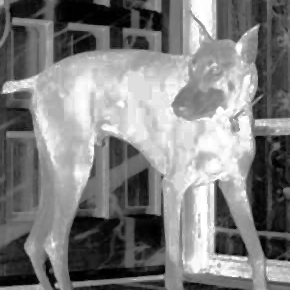

In [113]:
pil_image = oP7_DataBreed.read_image(dirbreed,imagename)

for pil_process in P7_DataBreed.P7_DataBreed.LIST_PIL_PROCESS :
    pil_image = pil_process(pil_image)
pil_image

### Using `P7_DataBreed` object for analysis

In [36]:
import cv2

import p3_util
import p3_util_plot


import P7_DataBreed
import p7_util

oP7_DataBreed_single = P7_DataBreed.P7_DataBreed()

oP7_DataBreed_single._dict_breed_sample=oP7_DataBreed._dict_breed_sample.copy()


list_restricted_image = [(breedname,[imagename])]

oP7_DataBreed_single.list_restricted_image = list_restricted_image

oP7_DataBreed_single.build_sift_desc(is_splitted=True)

*** build_sift_desc() ...

INFO : Error = 0 Total images processed= 16


/home/bangui/.local/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


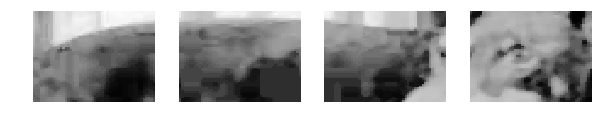

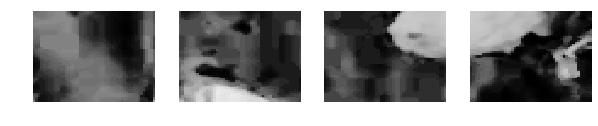

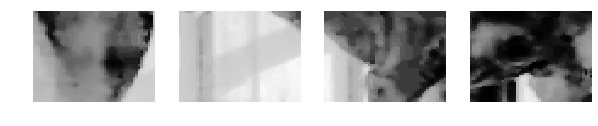

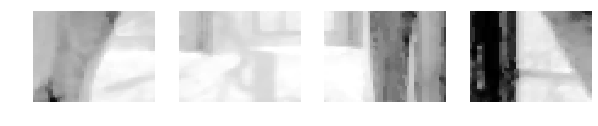

In [37]:
import p7_util
p7_util.p7_image_pil_show(oP7_DataBreed_single.dict_split_pil_image,std_image_size=(500,375), is_title=False)

##### Changing filtering process by adding edging process

In [39]:
type(edges)

numpy.ndarray

KP= 640
DESC= (640, 128)


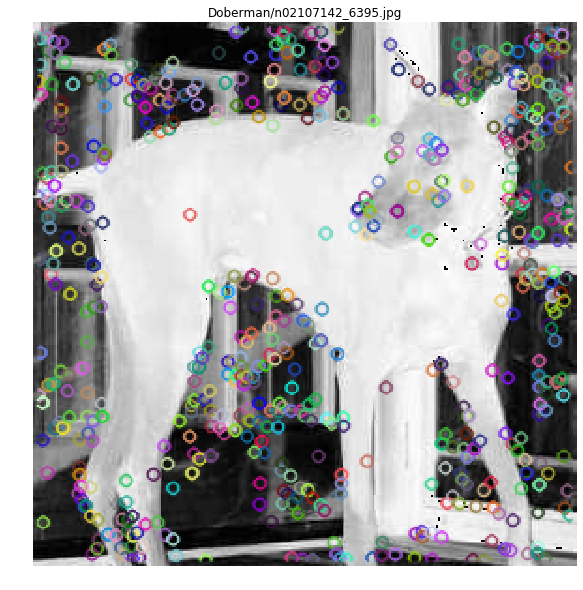

In [58]:
from PIL import Image
pil_image = Image.fromarray(edges-img)
pil_image = P7_DataBreed.pil_square(pil_image)
P7_DataBreed.show_pil_image_and_kp(pil_image,breedname+'/'+imagename)

KP= 483
DESC= (483, 128)


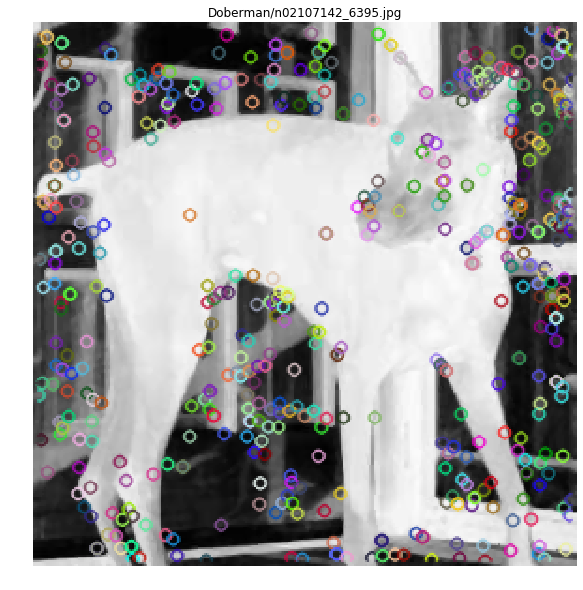

In [59]:
filename, pil_image = p7_util.p7_filter_median(pil_image)

P7_DataBreed.show_pil_image_and_kp(pil_image,breedname+'/'+imagename)

KP= 477
DESC= (477, 128)


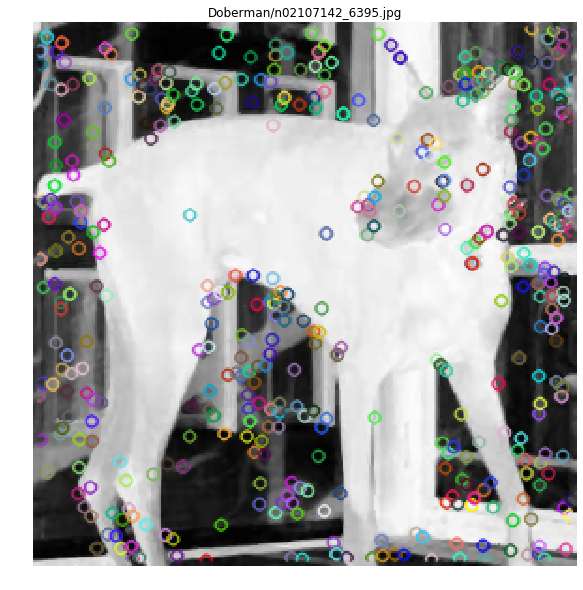

In [60]:
from PIL import ImageOps
pil_image = ImageOps.autocontrast(pil_image)
P7_DataBreed.show_pil_image_and_kp(pil_image,breedname+'/'+imagename)

KP= 651
DESC= (651, 128)


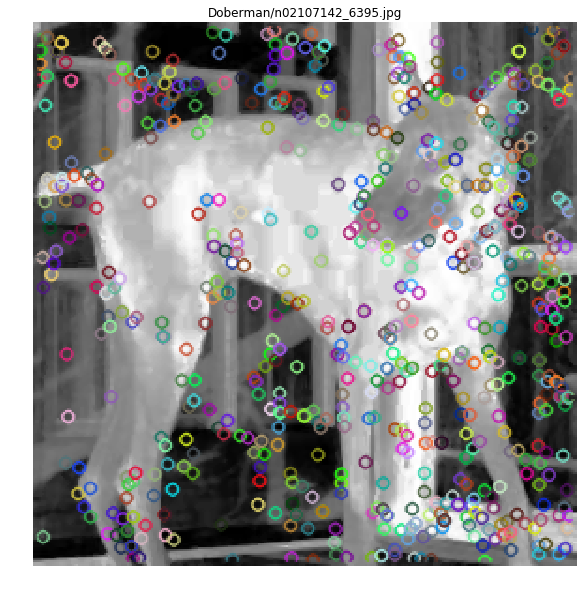

In [61]:
pil_image =ImageOps.equalize(pil_image)
P7_DataBreed.show_pil_image_and_kp(pil_image,breedname+'/'+imagename)

KP= 651
DESC= (651, 128)


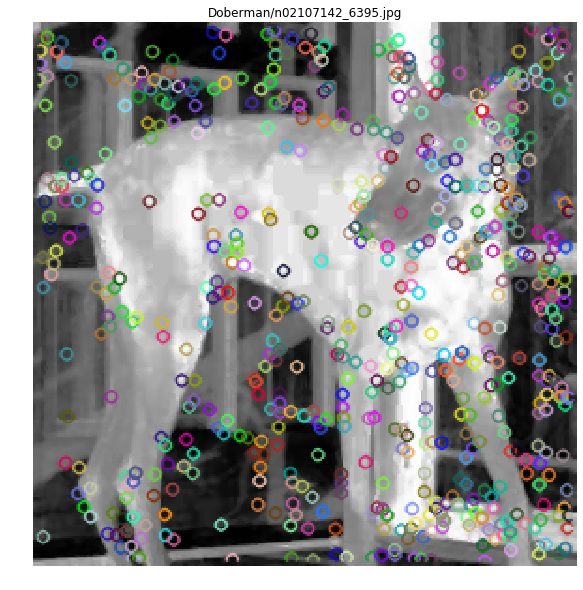

In [62]:
P7_DataBreed.show_pil_image_and_kp(pil_image,breedname+'/'+imagename)

In [88]:
list_filter= list()
list_filter.append(P7_DataBreed.pil_square)
list_filter.append(P7_DataBreed.pil_2gray)
list_filter.append(P7_DataBreed.pil_edge)
list_filter.append(P7_DataBreed.pil_truncate)
list_filter.append(P7_DataBreed.p7_filter_median)
list_filter.append(P7_DataBreed.pil_autocontrast)
list_filter.append(P7_DataBreed.pil_equalize)

list_filter

[<function P7_DataBreed.pil_square(pil_image, square=None)>,
 <function P7_DataBreed.pil_2gray(pil_image)>,
 <function P7_DataBreed.pil_edge(pil_image)>,
 <function P7_DataBreed.pil_truncate(pil_image, std_size)>,
 <function P7_DataBreed.p7_filter_median(pil_image)>,
 <function P7_DataBreed.pil_autocontrast(pil_image)>,
 <function P7_DataBreed.pil_equalize(pil_image)>]

In [86]:
list_filter.remove(P7_DataBreed.pil_equalize)
list_filter     

[<function P7_DataBreed.pil_square(pil_image, square=None)>,
 <function P7_DataBreed.pil_2gray(pil_image)>,
 <function P7_DataBreed.pil_edge(pil_image)>,
 <function P7_DataBreed.pil_truncate(pil_image, std_size)>,
 <function P7_DataBreed.p7_filter_median(pil_image)>,
 <function P7_DataBreed.pil_autocontrast(pil_image)>]

In [80]:
list_ = [1,2,34]

In [81]:
list_.pop(2)

34

In [82]:
list_.pop(0)
list_

[2]

In [28]:
dict_pil_image={0:[pil_image_0], 1:[pil_image_1]}

In [29]:
import P7_DataBreed

list_kpdesc = list()
for id, list_pil_image in dict_pil_image.items():
    for pil_image in list_pil_image :
        kp, desc = P7_DataBreed.get_image_kpdesc(pil_image)
        list_kpdesc.append((kp, desc))
dict_pil_image = {breedname : dict_pil_image.values()}
dict_breed_kpdesc={breedname:list_kpdesc}

In [54]:
list_kpdesc = dict_breed_kpdesc[breedname]
len(list_kpdesc)
tuple_kp_desc_1 = list_kpdesc[0]
list_kp_1  = tuple_kp_desc_1[0]
arr_desc_1 = tuple_kp_desc_1[1]

tuple_kp_desc_2 = list_kpdesc[1]
list_kp_2  = tuple_kp_desc_2[0]
arr_desc_2 = tuple_kp_desc_2[1]


In [ ]:
# list_kpdesc contains tuples (kp,desc)
kp1 = list_kp[0]
kp2 = list_kp[1]
desc1 = list_kpdesc[0][1]
desc2 = list_kpdesc[1][1]

In [59]:
image_pil_gray_1 = list(dict_pil_image[breedname])[0][0]
image_pil_gray_2 = list(dict_pil_image[breedname])[1][0]
type(image_pil_gray_2)

PIL.Image.Image

In [60]:
import cv2
import matplotlib.pyplot as plt

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_L2SQR, crossCheck=True)

# Match descriptors.
matches = bf.match(desc1,desc2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

image_pil_gray_3 = image_pil_gray_1
# Draw first 10 matches.
image_pil_gray_3 = cv2.drawMatches(np.array(image_pil_gray_1),kp1\
                                           ,np.array(image_pil_gray_2),kp2\
                                            ,matches[:20],np.array(image_pil_gray_3), flags=2)

plt.figure(figsize=(20,10))
z_=plt.imshow(image_pil_gray_3),plt.show()

SystemError: <built-in function drawMatches> returned NULL without setting an error

In [ ]:
import p7_util

filename, pil_image = p7_util.p7_filter_median(pil_image)
P7_DataBreed.show_pil_image_and_kp(pil_image,breedname)


In [ ]:
import P7_DataBreed
pil_image = P7_DataBreed.pil_equalize(pil_image)
P7_DataBreed.show_pil_image_and_kp(pil_image,breedname)

In [ ]:
import P7_DataBreed
pil_image_auto = P7_DataBreed.pil_autocontrast(pil_image)
P7_DataBreed.show_pil_image_and_kp(pil_image_auto,breedname)

In [ ]:
import numpy as np
from PIL import Image

arr_image_auto = np.array(pil_image_auto)
arr_image = np.array(pil_image)

operation = arr_image_auto + arr_image

Image.fromarray(operation)

#### Filtre Gradient

In [ ]:
import P7_DataBreed

import numpy as np
import p7_util

kernel=np.array([[0,1,-1],[0,1,-1],[0,1,-1]])
print(kernel)


filename, pil_image = p7_util.p7_filter_convolutional(pil_image, kernel, size=(3,3))
P7_DataBreed.show_pil_image_and_kp(pil_image,breedname)

#### Filtre Laplacien

In [ ]:
import P7_DataBreed

import numpy as np
import p7_util

kernel=np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1] ])
print(kernel)


filename, pil_image = p7_util.p7_filter_convolutional(pil_image, kernel, size=(3,3))
P7_DataBreed.show_pil_image_and_kp(pil_image,breedname)

#### Filtre passe-bas

In [ ]:
import P7_DataBreed

import numpy as np
import p7_util

kernel=np.array([[1,1,1],[1,4,1],[1,1,1] ])
print(kernel)


filename, pil_image = p7_util.p7_filter_convolutional(pil_image, kernel, size=(3,3))
P7_DataBreed.show_pil_image_and_kp(pil_image,breedname)

KP= 42
DESC= (42, 128)


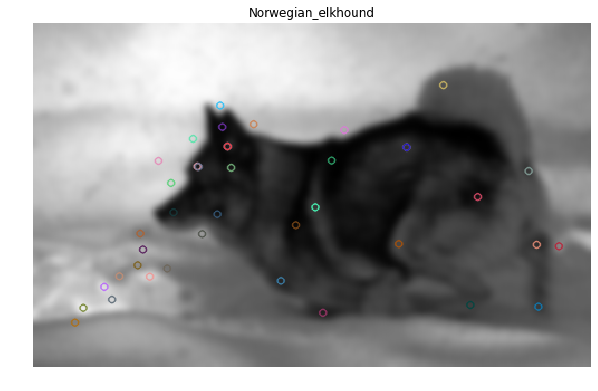

In [168]:
import P7_DataBreed
filename, pil_image_gauss = p7_util.p7_filter_gaussian(pil_image, size=3)

P7_DataBreed.show_pil_image_and_kp(pil_image_gauss,breedname)

In [ ]:
import numpy as np
from PIL import Image

arr_pil_image = np.array(pil_image)
arr_pil_image_gauss=np.array(pil_image_gauss)

addition = arr_pil_image - arr_pil_image_gauss

Image.fromarray(addition)

In [ ]:
import P7_DataBreed
filename, pil_image = p7_util.p7_filter_gaussian(pil_image, size=3)

P7_DataBreed.show_pil_image_and_kp(pil_image,breedname)

In [ ]:
import P7_DataBreed
P7_DataBreed.show_pil_image_and_kp(pil_image,breedname)

In [ ]:

breedname = dingo
dict_split_pil_image = self.split_pil_image(pil_image,breedname)
for id_breedname, list_split_pil_image in dict_split_pil_image.items() :
    for split_pil_image in list_split_pil_image :
        kp, desc = get_image_kpdesc(split_pil_image)
        dict_breed_kpdesc[image_count] = (desc,breedname)
        image_count +=1


# Whitening

In [ ]:
arr = np.array([[0,1,2,3],[1,2,3,4],[2,1,2,5],[3,2,3,6]])
print(arr.shape)
print(arr)
margin=1

# Horizontal truncation
arr = arr[margin:,:]
arr = arr[:-margin,:]

# Vertical truncation
arr = arr[:,margin:]
arr = arr[:,:-margin]

print(arr)

In [ ]:
import numpy as np

breedname = 'n02115641-dingo'
imagename = 'n02115641_13565.jpg'

pil_image = oP7_DataBreed.read_image('n02115641-dingo','n02115641_13565.jpg')

np.array(pil_image).shape
pil_image = P7_DataBreed.pil_2gray(pil_image)
arr_image = np.array(pil_image)

def image_square(pil_image):
    arr_image = np.array(pil_image)

    delta = arr_image.shape[0] - arr_image.shape[1]
    margin = np.abs(int(delta/2))
    print(arr_image.shape)
    if arr_image.shape[0] >= arr_image.shape[1]:
        # Horizontal truncation
        arr_image = arr_image[margin:,:]
        arr_image = arr_image[:-margin,:]

    else :
        # Vertical truncation
        arr_image = arr_image[:,margin:]
        arr_image = arr_image[:,:-margin]
    return Image.fromarray(arr_image)
    
image_square(pil_image)

In [ ]:
np.array(pil_image).shape

In [ ]:
import P7_DataBreed
oP7_DataBreed = P7_DataBreed.P7_DataBreed()
oP7_DataBreed.std_size=(208,208)
dict_pil_image = oP7_DataBreed.split_pil_image(pil_image,breedname.split('-')[1], ratio=(13,13))

dict_pil_image.keys()


In [ ]:
print(int(208/13))

In [ ]:
import p7_util
p7_util.p7_image_pil_show(dict_pil_image,std_image_size=(16,16),size_x=16, is_title=False)

In [ ]:
import numpy as np

dict_pil_white = dict()
raw=0

for breedname, list_image in dict_pil_image.items():
    list_pil_white = list()
    for image in list_image:
        list_pil_white.append(zca_whitening_matrix(np.array(image)))
    dict_pil_white[raw] = list_pil_white
    raw +=1
        

In [ ]:
all_arr = np.zeros((16,16*27+16))

for raw, list_pil_white in dict_pil_white.items() :
    arr = np.zeros((16,16))
    for pil_white in list_pil_white :
        arr = np.hstack((arr,np.array(pil_white)))
    all_arr = np.vstack((all_arr,arr))
    print(arr.shape, all_arr.shape)


In [ ]:
import p7_util
p7_util.p7_image_pil_show(dict_pil_white,std_image_size=(16,16),size_x=16, is_title=False)

In [ ]:
help(Image.fromarray)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(all_arr)